In [1]:
# Based on https://machinelearningmastery.com/develop-word-embeddings-python-gensim/
# Gensim docs: https://radimrehurek.com/gensim/auto_examples/index.html#documentation

In [2]:
# Install if necessary
# !pip install gensim

In [3]:
# Import
from gensim.models import Word2Vec

In [4]:
# String (data) to experiment with - from water - 
# -- https://www.epa.gov/sdwa/drinking-water-regulations-and-contaminants
data = """
National Secondary Drinking Water Regulations (NSDWRs)
NSDWRs (or secondary standards) are non-enforceable guidelines regulating contaminants that may cause cosmetic effects (such as skin or tooth discoloration) or aesthetic effects (such as taste, odor, or color) in drinking water. 
EPA recommends secondary standards to water systems but does not require systems to comply with the standard. However, states may choose to adopt them as enforceable standards.
"""
print (data)


National Secondary Drinking Water Regulations (NSDWRs)
NSDWRs (or secondary standards) are non-enforceable guidelines regulating contaminants that may cause cosmetic effects (such as skin or tooth discoloration) or aesthetic effects (such as taste, odor, or color) in drinking water. 
EPA recommends secondary standards to water systems but does not require systems to comply with the standard. However, states may choose to adopt them as enforceable standards.



In [5]:
# We get it by getting words from split; a hack
import re
pattern = "[\n.]"
corpus = re.split(pattern, data)
# Removing empty strings
corpus = [[token for token in i.split() ] for i in corpus if i]
print (corpus)

[['National', 'Secondary', 'Drinking', 'Water', 'Regulations', '(NSDWRs)'], ['NSDWRs', '(or', 'secondary', 'standards)', 'are', 'non-enforceable', 'guidelines', 'regulating', 'contaminants', 'that', 'may', 'cause', 'cosmetic', 'effects', '(such', 'as', 'skin', 'or', 'tooth', 'discoloration)', 'or', 'aesthetic', 'effects', '(such', 'as', 'taste,', 'odor,', 'or', 'color)', 'in', 'drinking', 'water'], [], ['EPA', 'recommends', 'secondary', 'standards', 'to', 'water', 'systems', 'but', 'does', 'not', 'require', 'systems', 'to', 'comply', 'with', 'the', 'standard'], ['However,', 'states', 'may', 'choose', 'to', 'adopt', 'them', 'as', 'enforceable', 'standards']]


In [6]:
# train model
model = Word2Vec(corpus, min_count=1)
# summarize the loaded model
print("INFO: Model - \n" + str(model))

INFO: Model - 
Word2Vec(vocab=52, size=100, alpha=0.025)


In [7]:
# summarize vocabulary
words = list(model.wv.vocab)
print("INFO: Words found - \n" + str(words))

INFO: Words found - 
['National', 'Secondary', 'Drinking', 'Water', 'Regulations', '(NSDWRs)', 'NSDWRs', '(or', 'secondary', 'standards)', 'are', 'non-enforceable', 'guidelines', 'regulating', 'contaminants', 'that', 'may', 'cause', 'cosmetic', 'effects', '(such', 'as', 'skin', 'or', 'tooth', 'discoloration)', 'aesthetic', 'taste,', 'odor,', 'color)', 'in', 'drinking', 'water', 'EPA', 'recommends', 'standards', 'to', 'systems', 'but', 'does', 'not', 'require', 'comply', 'with', 'the', 'standard', 'However,', 'states', 'choose', 'adopt', 'them', 'enforceable']


In [8]:
# Get  vector for any word - specified by myword
myword = 'Water'
print("INFO: Model of '" + myword + "' - \n" + str(model[myword]))

INFO: Model of 'Water' - 
[-4.0418128e-03  4.3899770e-04 -4.9924268e-03 -1.0609076e-03
 -2.1542250e-05  3.4523397e-03  3.9142952e-03 -4.7446240e-04
 -9.8380481e-04  7.7623420e-04 -3.1382460e-03  4.8998925e-03
  3.6610595e-03  1.1799088e-03 -4.4013760e-03 -1.7951675e-03
 -2.6150392e-03  2.3254105e-03 -5.4193173e-05  3.6866493e-03
 -2.8674712e-03 -4.1105920e-03 -1.1109215e-03 -2.9878998e-03
 -2.2018857e-03 -1.3005063e-03 -1.8975756e-03  4.7314097e-03
  1.2336441e-03  1.0782271e-03  1.8843547e-03  1.3839875e-03
 -2.4850250e-03 -1.3078959e-03 -3.3887930e-03  3.1743224e-03
  3.8355412e-03  2.7162550e-04  3.7684178e-03  3.5063995e-03
  8.8211964e-04  4.4124243e-03 -4.0091765e-03  1.4421432e-03
 -7.2706083e-04  2.1929578e-03 -4.8268177e-03 -4.4320165e-03
 -3.2247957e-03  4.0602251e-03  2.8547896e-03 -3.8351980e-03
  3.3282251e-03  1.2670726e-03  8.5540337e-04  2.2276223e-03
 -7.7005354e-04 -8.0672285e-04  1.9371773e-03 -4.4461363e-03
  2.6368783e-03 -1.0075856e-03 -2.4206212e-03  1.0140176e-0

<ipython-input-8-081b90cda7ab>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print("INFO: Model of '" + myword + "' - \n" + str(model[myword]))


In [9]:
# Visualize representation
X = model[model.wv.vocab]

<ipython-input-9-710e04855afe>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


In [10]:
# Imports needed
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [11]:
# Get Principal Components
pca = PCA(n_components=2)
result = pca.fit_transform(X)

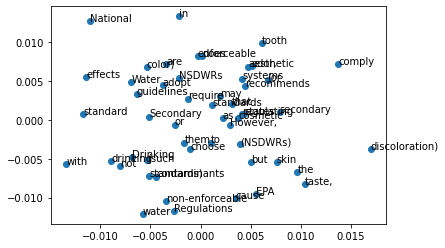

In [12]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [13]:
# Learn W2V and draw principal components
# Also has a stop list
def WVlearnNDraw(data):
    # prepare data
    pattern = "[\n.]"
    corpus = re.split(pattern, data)
    # Create a set of frequent words
    stoplist = set('does it but and is by for a of the and to in'.split(' '))
    corpus = [[token for token in i.split() if token not in stoplist] for i in corpus if i]
    # train model
    model = Word2Vec(corpus, min_count=1) 
    # All vectors of a trained model
    X = model[model.wv.vocab]
    # Get Principal Components
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    # create a scatter plot of the projection
    pyplot.scatter(result[:, 0], result[:, 1])
    words = list(model.wv.vocab)
    for i, word in enumerate(words):
        pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    pyplot.show()

In [14]:
# -- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
data2 = """
Principal component analysis (PCA).
Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.
It uses the LAPACK implementation of the full SVD or a randomized truncated SVD by the method of Halko et al. 2009, depending on the shape of the input data and the number of components to extract.
It can also use the scipy.sparse.linalg ARPACK implementation of the truncated SVD.
Notice that this class does not support sparse input. See TruncatedSVD for an alternative with sparse data.
"""
print (data2)


Principal component analysis (PCA).
Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.
It uses the LAPACK implementation of the full SVD or a randomized truncated SVD by the method of Halko et al. 2009, depending on the shape of the input data and the number of components to extract.
It can also use the scipy.sparse.linalg ARPACK implementation of the truncated SVD.
Notice that this class does not support sparse input. See TruncatedSVD for an alternative with sparse data.



<ipython-input-13-79359a9209dd>:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


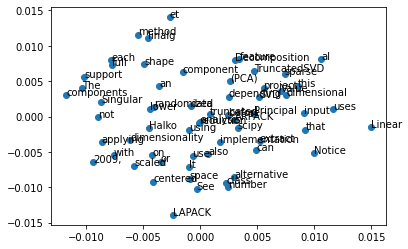

In [15]:
WVlearnNDraw(data2)

<ipython-input-13-79359a9209dd>:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


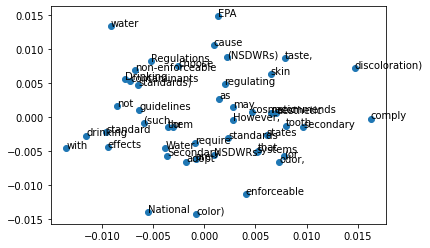

In [16]:
WVlearnNDraw(data)